In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('combined_df.csv')

In [18]:
# Change string numbers to floats
df['collegeEnrollmentData_state_average'] = df['collegeEnrollmentData_state_average'].str.strip('%')
df['collegeEnrollmentData_school_value'] = df['collegeEnrollmentData_school_value'].str.strip('%')
df['percentLowIncome'] = df['percentLowIncome'].str.strip('%')

In [22]:
# Change string numbers to floats
df['collegeEnrollmentData_state_average'] = df['collegeEnrollmentData_state_average'].astype(float)
df['collegeEnrollmentData_school_value'] = df['collegeEnrollmentData_school_value'].astype(float)
df['percentLowIncome'] = df['percentLowIncome'].astype(float)

In [84]:
# Visualize college readiness rating distribution
def college_readiness_distribution(df):
    sns.set_style("darkgrid")
    sns.distplot(df["subratings_College Readiness Rating"], bins=10, kde=False)
    plt.title('College Readiness Rating Distribution', fontsize=16)
    plt.xlabel('College Readiness Rating', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(np.arange(df["subratings_College Readiness Rating"].min(), df["subratings_College Readiness Rating"].max()+1));

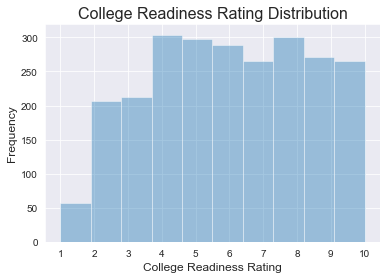

In [85]:
college_readiness_distribution(df)

In [65]:
# Scatterplot function
def scatterplot(x, y, data, title, xlabel, ylabel, hline=0, vline=0):
    plt.scatter(x, y, data=data, s=8)
    plt.title(title, fontsize=16)
    plt.xticks(np.arange(0, data[x].max(), step=10))
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    if hline != 0:
        plt.axhline(hline, color='r')
    if vline != 0:
        plt.axvline(vline, color='g')
    


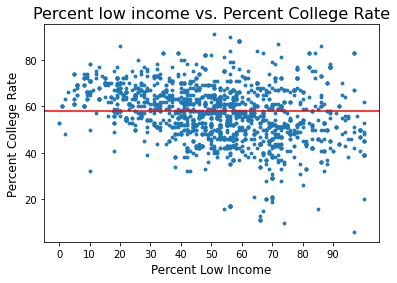

In [66]:
# Percent Low Income vs. Percent College Rate
scatterplot('percentLowIncome', 'collegeEnrollmentData_school_value', df, 
            'Percent Low Income vs. Percent College Rate', 'Percent Low Income', 'Percent College Rate', 
            hline=df['collegeEnrollmentData_state_average'].mean())

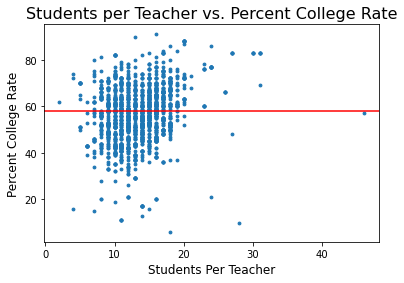

In [67]:
# Scatterplot of students per teacher vs college enrollment rates
scatterplot('studentsPerTeacher', 'collegeEnrollmentData_school_value', df, 
            'Students per Teacher vs. Percent College Rate', 'Students Per Teacher', 'Percent College Rate', 
            hline=df['collegeEnrollmentData_state_average'].mean())

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           2656 non-null   int64  
 1   id                                   2656 non-null   int64  
 2   districtId                           2656 non-null   int64  
 3   districtName                         2656 non-null   object 
 4   districtCity                         2656 non-null   object 
 5   levelCode                            2656 non-null   object 
 6   name                                 2656 non-null   object 
 7   gradeLevels                          2656 non-null   object 
 8   csaAwardYears                        2281 non-null   object 
 9   rating                               2656 non-null   int64  
 10  ratingScale                          2656 non-null   object 
 11  schoolType                    

In [101]:
# Exploratory Boxplot
def exploratory_boxplot(x, y, df, title, xlabel, ylabel):
    sns.set_style("darkgrid")
    ax = sns.boxplot(x, y,
                 data=df, palette="Set3")
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12);

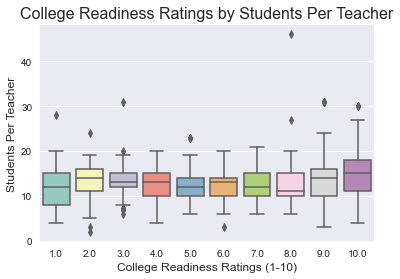

In [102]:
# Boxplot of College Readiness Ratings by Students per Teacher 
exploratory_boxplot('subratings_College Readiness Rating', 'studentsPerTeacher', df, 
                                         'College Readiness Ratings by Students Per Teacher', 
                                         'College Readiness Ratings (1-10)',
                                        'Students Per Teacher')

We don't see a major pattern between college readiness ratings and students per teacher. In fact, the median students per teadcher for schools rated a 9 or a 10 are higher than lower ratings.

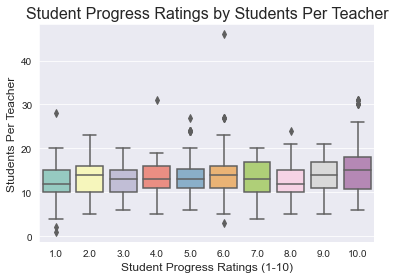

In [128]:
# Boxplot of Student Progress Rating by Students per Teacher

exploratory_boxplot('subratings_Student Progress Rating', 'studentsPerTeacher', df, 
                                         'Student Progress Ratings by Students Per Teacher', 
                                         'Student Progress Ratings (1-10)',
                                        'Students Per Teacher');

In [115]:
df.groupby('subratings_Student Progress Rating')['studentsPerTeacher'].median()

subratings_Student Progress Rating
1.0     12.0
2.0     14.0
3.0     13.0
4.0     13.0
5.0     13.0
6.0     14.0
7.0     13.0
8.0     12.0
9.0     14.0
10.0    15.0
Name: studentsPerTeacher, dtype: float64

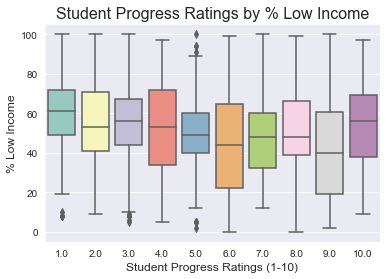

In [121]:
# Boxplot comparing percent low income to student progress rating
exploratory_boxplot('subratings_Student Progress Rating', 'percentLowIncome', df, 
                                         'Student Progress Ratings by % Low Income', 
                                         'Student Progress Ratings (1-10)',
                                        '% Low Income');

In [119]:
df.groupby('subratings_Student Progress Rating')['percentLowIncome'].median()

subratings_Student Progress Rating
1.0     61.0
2.0     53.0
3.0     56.0
4.0     53.0
5.0     49.0
6.0     44.0
7.0     48.0
8.0     48.0
9.0     40.0
10.0    56.0
Name: percentLowIncome, dtype: float64

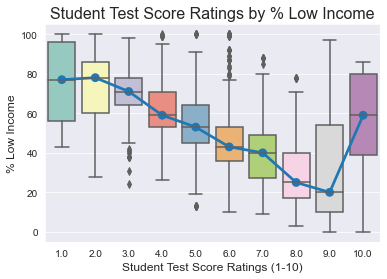

In [127]:
# Boxplot comparing percent low income and test score ratings. Includes a pointplot overlap.
sns.pointplot(x='subratings_Test Scores Rating', y='percentLowIncome', data=df.groupby('subratings_Test Scores Rating', as_index=False).median())
exploratory_boxplot('subratings_Test Scores Rating', 'percentLowIncome', df, 
                                         'Student Test Score Ratings by % Low Income', 
                                         'Student Test Score Ratings (1-10)',
                                        '% Low Income')


In [123]:
df.groupby('subratings_Test Scores Rating')['percentLowIncome'].median()

subratings_Test Scores Rating
1.0     77.0
2.0     78.0
3.0     71.0
4.0     59.0
5.0     53.0
6.0     43.0
7.0     40.0
8.0     25.0
9.0     20.0
10.0    59.0
Name: percentLowIncome, dtype: float64

We can see a true pattern between test scores and percentage of low income. It is interesting to note that at the 10 test score rating, the median percentage of low income students jumps up to 59%.

In [134]:
df.to_csv('combined_df.csv')